# Data cleaning exercise - Titanic dataset

Cleaning data is a vital step in projects of any kind. Its overall objective is to ensure that the data is accurate, consistent and free of errors. This involves checking the quality of the data, assuring that there are no weird values, and removing missing, duplicate or irrelevant data, among other processes.

For this data, the Titanic dataset will be used, which is a public dataset that contains demographic and survival information of passengers aboard the RMS Titanic. Like many real-world datasets, it contains missing values, inconsistent entries, outliers, and irrelevant variables. The goal of this project is to perform a complete data-cleaning pipeline that prepares the dataset for further analysis or modelling.

It is important to consider the context of the data you are working with. A value by itself does not mean anything if it is not put into perspective. For example, if you are measuring the length of many leaves, and you see many values of near 20, and you suddenly see a value of 200, you have to think why is that. Is it a 20 that someone input with an extra 0? Or maybe is it just that the data is measured in centimeters, but someone used millimeters?

So, performing data cleaning involves a systematic process to identify and remove errors in a dataset. The following steps are essential to perform data cleaning:

- Removing unwanted observations: duplicates, irrelevant entries or redundant data.
- Fixing structural errors: standardizing data formats and variable types for consistency.
- Managing outliers: detecting and handling extreme values that can skew results, either by removal or transformation.
- Handling missing data: addressing gaps using imputation, deletion or advanced techniques to maintain accuracy and integrity.

Let's start the project by loading the necessary libraries and modules, and importing the data:

In [18]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Check if the data is loaded correctly
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


And obtain a brief description of the data:

In [19]:
# Check the number of variables and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Seeing the discrepancy with the non-null counts for each variable, we can infer that the dataset is not perfect and, thus, some data cleaning is needed.

Let's follow up by removing any possible duplicated observations:

In [20]:
# Checking for duplicated observations
df.duplicated().sum()

0

No duplicated rows were found, thankfully.

Next, let's check which variables are numerical and which categorical. That information can be seen already using the df.info() command, but let's see in a more arranged way:

In [21]:
# Define categorical and numerical variables
categoricals = [col for col in df.columns if df[col].dtype == 'object']
numericals = [col for col in df.columns if df[col].dtype != 'object']

print('Categorical variables:', categoricals)
print('Numerical variables:', numericals)

Categorical variables: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical variables: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


Seems correct, but it is important to be aware of the details. For example, *Survived* is considered a numerical variable, which it is, because it is defined as 0 (not survived) or 1 (survived). Thus, we have to consider if we want to change this variable into a categorical one, but this depends on the objective of the project that you will use the data for.

Now, to get a better idea of the variables we are working with, we can check the unique counts of the categorical variables:

In [22]:
# Unique counts of the categorical variables
df[categoricals].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

Next, let's which % of the data is defined as missing value:

In [23]:
# Sum missing across columns, normalize by total rows and multiply by 100
round(df.isnull().sum() / df.shape[0] * 100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

Three of the variables present NaN values. Depending on the project, mutiple decisions can be made to deal with this situation. In this case, let's use 3 examples by creating a new dataframe with the modified version of the original:

1. The *Cabin* variable presents too many NaN. Let's drop it:
2. The *Age* variable presents around a 20% of NaNs. Let's fill the gaps with the average age value.
3. The *Embarked* variable just has a few NaNs. Let's drop the observations that contain them.

In [24]:
# Dropping the Cabin variable
df2 = df.drop(columns = 'Cabin')

# Filling the Age gaps with the average value
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())

# Dropping the Embarked NaN observations
df2.dropna(subset=['Embarked'], inplace = True)

And check again the % of NaNs, in the new dataframe:

In [25]:
# % of NaNs in the new dataframe
round(df2.isnull().sum() / df2.shape[0] * 100, 2)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

We now have no NaN values in the df.

Next, time to check for outliers by using a box-plot, which displays the distribution of data, highlighting the quartiles and the outliers. This can be done for any of the previously considered variables, but for this example, *Age* will be used:

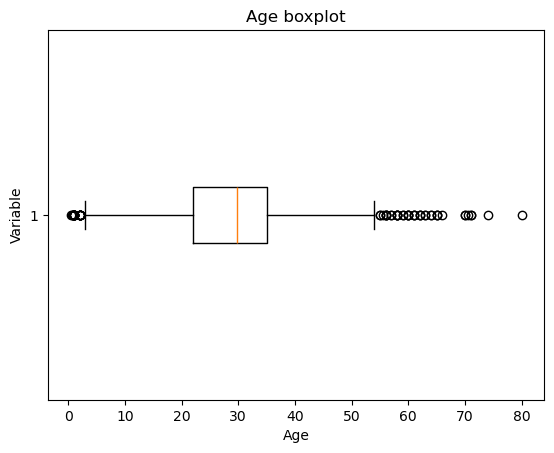

In [26]:
# Box-plot of the new dataframe (df2)
plt.boxplot(df2['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Age boxplot')
plt.show()

It can be observed that there are a lot of outliers, and we can remove them using a numerical criterion. 

One common approach is to define acceptable values as **mean ± 2 × standard deviation**. This threshold is based on the empirical rule of the normal distribution, which states that about 95% of the data lie within two standard deviations from the mean. Values outside this range are unusually extreme relative to the rest of the dataset, and therefore can be treated as outliers. By applying this rule, we filter out the most atypical observations detected visually in the boxplot using a clear, quantitative threshold. This method works best when the variable is roughly symmetric and not heavily skewed, which usually happens with human age.

Thus, to remove the outliers:

Lower Bound : 3.7167137521695857
Upper Bound : 55.59017898917891


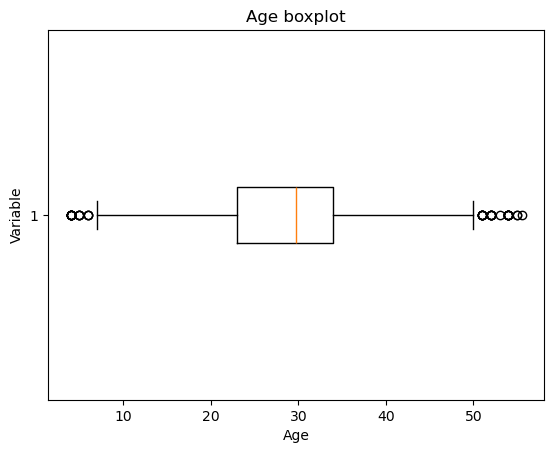

In [27]:
# Calculate the mean and standard deviation
mean = df2['Age'].mean() 
std = df2['Age'].std()

# Define bounds as mean ± 2 * std for outlier detection
lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

# Show the bounds
print('Lower Bound :', lower_bound)
print('Upper Bound :', upper_bound)

# Filter the data with the considered bounds
df3 = df2[(df2['Age'] >= lower_bound) & (df2['Age'] <= upper_bound)]

# Box-plot of the new dataframe (df3)
plt.boxplot(df3['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Age boxplot')
plt.show()

There are still some outliers, but data is now more normally distributed. Let's see the *Age* distribution before and after the cleaning to compare this:

(array([ 30.,  14.,  10.,  14.,   3.,  29.,  39.,  65.,  73.,  42.,  65.,
        239.,  33.,  47.,  37.,  21.,  28.,  21.,  16.,  14.,  15.,   7.,
          9.,   7.,   4.,   0.,   5.,   1.,   0.,   1.]),
 array([ 0.42      ,  3.07266667,  5.72533333,  8.378     , 11.03066667,
        13.68333333, 16.336     , 18.98866667, 21.64133333, 24.294     ,
        26.94666667, 29.59933333, 32.252     , 34.90466667, 37.55733333,
        40.21      , 42.86266667, 45.51533333, 48.168     , 50.82066667,
        53.47333333, 56.126     , 58.77866667, 61.43133333, 64.084     ,
        66.73666667, 69.38933333, 72.042     , 74.69466667, 77.34733333,
        80.        ]),
 <BarContainer object of 30 artists>)

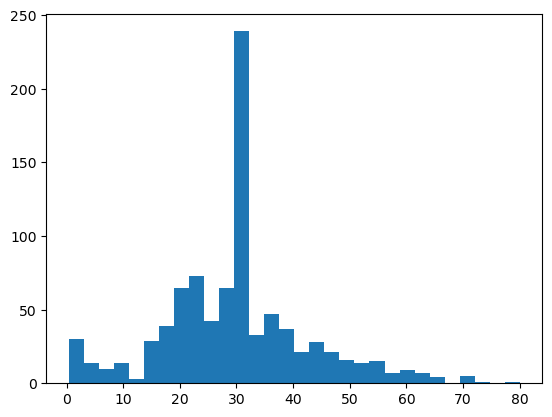

In [28]:
# Age distribution before data cleaning
plt.hist(df2['Age'], bins=30)

(array([ 14.,   6.,  12.,   2.,   5.,   8.,  23.,  13.,  51.,  40.,  27.,
         47.,  41.,  43., 199.,  44.,  35.,  16.,  41.,  16.,  27.,   8.,
         18.,  21.,   5.,  18.,  16.,  13.,   1.,  11.]),
 array([ 4.        ,  5.71666667,  7.43333333,  9.15      , 10.86666667,
        12.58333333, 14.3       , 16.01666667, 17.73333333, 19.45      ,
        21.16666667, 22.88333333, 24.6       , 26.31666667, 28.03333333,
        29.75      , 31.46666667, 33.18333333, 34.9       , 36.61666667,
        38.33333333, 40.05      , 41.76666667, 43.48333333, 45.2       ,
        46.91666667, 48.63333333, 50.35      , 52.06666667, 53.78333333,
        55.5       ]),
 <BarContainer object of 30 artists>)

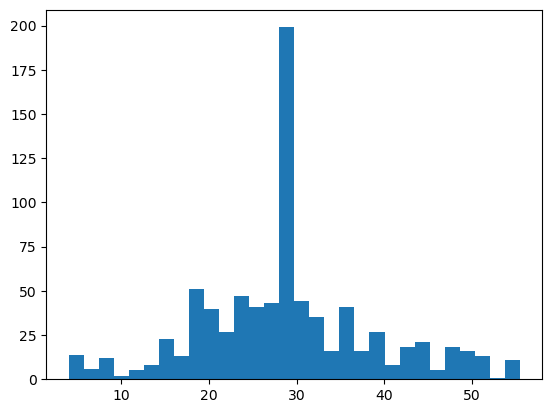

In [29]:
# Age distribution after data cleaning
plt.hist(df3['Age'], bins=30)

Data is now more normal and with less outliers.

After removing duplicates, filling missing values, dropping problematic variables, and filtering outliers, the final cleaned dataset has consistent types, no missing values, and no extreme outliers. This new version would be suitable for exploratory analyses or building predictive models.

I hope this helps!